In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import skimage.io

In [2]:
exp_name = 'mp3d_nodepth_perceptual_l1laplacian_inpaintGonly_freezemesh'
n_iter = 40000
split = 'mp3d_val'

save_dir = f'../save/visualization_synsin_habitat/{exp_name}/{n_iter}/{split}'

In [3]:
def plot_results(results, show_title=True):
    plt.figure(figsize=(15, 3))
    plt.subplots_adjust(wspace=0)

    plt.subplot(1, 5, 1)
    plt.imshow(results['orig_img_0'])
    if show_title:
        plt.title('input view')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(results['orig_img_1'])
    if show_title:
        plt.title('novel view (ground-truth)')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(results['rgb_1_inpaint'][..., :3])
    if show_title:
        plt.title('novel view (ours)')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(results['rgba_1_rec'][..., :3])
    if show_title:
        plt.title('novel view (ours w/o inpaint)')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(results['mesh_shape_1'][..., :3])
    if show_title:
        plt.title('novel view mesh')
    plt.axis('off')

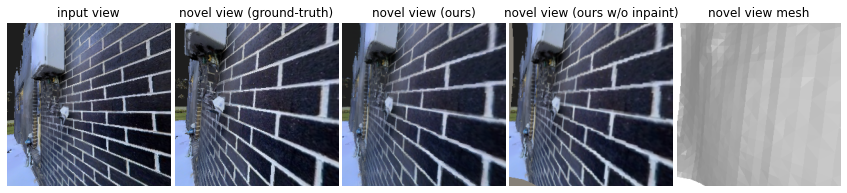

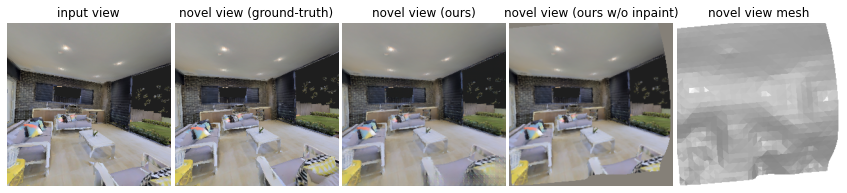

In [4]:
result_files = sorted(glob(os.path.join(save_dir, '*.npz')))
for file in result_files[14:16]:
    d = np.load(file)
    name = '_'.join(os.path.basename(file).replace('_outputs.npz', '').split('_')[1:])
    results = dict(d)
    plot_results(results)
    d.close()